## Allow saving to my Google drive

In [8]:
!mkdir -p /content/drive/MyDrive/AAA-MS6363  # Create directory if it doesn't exist
!wget -O /content/drive/MyDrive/AAA-MS6363/imagenette2-160.tgz https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xvzf /content/drive/MyDrive/AAA-MS6363/imagenette2-160.tgz -C /content/drive/MyDrive/AAA-MS6363/


Streaming output truncated to the last 5000 lines.
imagenette2-160/train/n03888257/n03888257_16077.JPEG
imagenette2-160/train/n03888257/n03888257_23339.JPEG
imagenette2-160/train/n03888257/n03888257_44204.JPEG
imagenette2-160/train/n03888257/n03888257_61633.JPEG
imagenette2-160/train/n03888257/n03888257_15067.JPEG
imagenette2-160/train/n03888257/n03888257_75365.JPEG
imagenette2-160/train/n03888257/n03888257_63966.JPEG
imagenette2-160/train/n03888257/n03888257_3927.JPEG
imagenette2-160/train/n03888257/n03888257_20684.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-160/train/n03888257/n03888257_14016.JPEG
imagenette2-160/train/n03888257/n03888257_37776.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-160/train/n03888257/n03888257_17513.JPEG
imagenette2-160/train/n03888257/n03888257_17143.JPEG
imagenette2-160/train/n03888257/n03888257_6738.JPEG
imagenette2-160/train/n03888257/n03888257_4355.JPEG
imagenette2-160/train/n03888257/ILS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

!pip uninstall -y torch torchvision torchaudio pytorch-lightning
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install pytorch-lightning



Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip list | grep torch

pytorch-lightning                  2.5.0.post0
torch                              2.6.0+cu124
torchaudio                         2.6.0+cu124
torchmetrics                       1.6.2
torchsummary                       1.5.1
torchvision                        0.21.0+cu124


In [3]:
#Test import environment worked
import torch
import torchvision
import torchvision.transforms as transforms
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import os
print(torch.__version__)

2.6.0+cu124


# **!!!Change path to the path that contains your data!!!**

In [4]:
dataset_path = "/content/drive/MyDrive/AAA-MS6363/imagenette2-160"
model_path = "/content/drive/MyDrive/AAA-MS6363/models"

In [5]:
import os
os.makedirs(dataset_path, exist_ok=True)
os.makedirs(model_path, exist_ok=True)

# **Skip next two cells**
Creating environment and downloading necessary modules to the environment for easy loading in future.

In [6]:
import os
os.makedirs('/content/drive/MyDrive/AAA-MS6363/colab_env', exist_ok=True)


In [7]:
!pip install --target=/content/drive/MyDrive/AAA-MS6363/colab_env torch torchvision torchaudio pytorch-lightning


  Using cached pytorch_lightning-2.5.0.post0-py3-none-any.whl.metadata (21 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-

# **End skipped Cells**

# Define a basic CNN
##### Implementation by chatGPT

# Architecture Summary
This CNN consists of three convolutional layers, each followed by ReLU activation and max pooling to extract and downsample image features. The output is flattened and passed through two fully connected layers, with dropout (0.5) to reduce overfitting. The model is trained using CrossEntropyLoss and optimized using Adam.

In [4]:
# Define CNN model using PyTorch Lightning
class BasicCNN(pl.LightningModule):
    def __init__(self, num_classes=10, lr=1e-3):
        super(BasicCNN, self).__init__()
        self.lr = lr

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


## Set up the data to train

In [5]:
import os
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
print(dataset_path)
# Download and load the Imagenette dataset
train_dataset = ImageFolder(root=os.path.join(dataset_path, "train"), transform=transform)
val_dataset = ImageFolder(root=os.path.join(dataset_path, "val"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}")


/content/drive/MyDrive/AAA-MS6363/imagenette2-160
Train size: 9469, Validation size: 3925


## Train the model on the data.

In [6]:
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning import Trainer

# Initialize the model
model = BasicCNN(num_classes=len(train_dataset.classes), lr=1e-3)

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min")

# Train the model
trainer = Trainer(max_epochs=10, accelerator="gpu" if torch.cuda.is_available() else "cpu", callbacks=[early_stopping])
trainer.fit(model, train_loader, val_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type             | Params | Mode 
---------------------------------------------------------
0 | conv_layers | Sequential       | 93.2 K | train
1 | fc_layers   | Sequential       | 8.4 M  | train
2 | criterion   | CrossEntropyLoss | 0      | train
---------------------------------------------------------
8.5 M     Trainable params
0         Non-trainable params
8.5 M     Total params
33.939    Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Save the model

In [12]:
torch.save(model.state_dict(), os.path.join(model_path, "basic_cnn.pth"))
print(f"Model saved as {model_path}/basic_cnn.pth")


Model saved as /content/drive/MyDrive/AAA-MS6363/models/basic_cnn.pth


Test the model by:
1. Evaluating its performance (accuracy, loss)
2. Identify potential weaknesses (overfitting, underfitting)
3. Collect data to compare against ResNet-18.

In [14]:
# Load the saved model
model = BasicCNN(num_classes=len(train_dataset.classes))
model.load_state_dict(torch.load(os.path.join(model_path, "basic_cnn.pth")))
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

print("Model loaded successfully!")


Model loaded successfully!


<ipython-input-14-6a11b54e92f7>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "basic_cnn.pth")))


## Evaluate the model.

In [15]:
import torch
import numpy as np

# Function to calculate accuracy
def evaluate_model(model, dataloader):
    correct, total = 0, 0
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = outputs.argmax(dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model
val_accuracy = evaluate_model(model, val_loader)
print(f"Validation Accuracy: {val_accuracy:.2f}%")


Validation Accuracy: 68.87%


## Test the model.
Using a few images to visualize predictions.

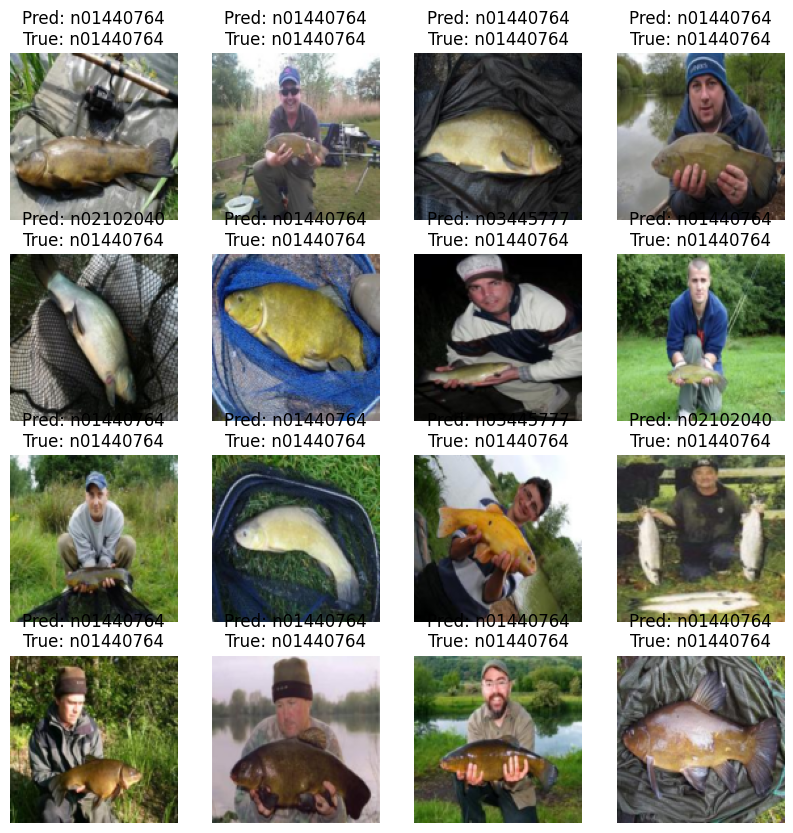

In [16]:
import matplotlib.pyplot as plt
import torchvision.utils

# Get a batch of validation images
dataiter = iter(val_loader)
images, labels = next(dataiter)

# Move images to the same device as model
device = "cuda" if torch.cuda.is_available() else "cpu"
images = images.to(device)
labels = labels.to(device)

# Get model predictions
model.to(device)
model.eval()
outputs = model(images)
predicted_labels = outputs.argmax(dim=1)

# Display the images with predicted labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = images[i].cpu().permute(1, 2, 0).numpy()  # Convert tensor to image
    img = (img * 0.5) + 0.5  # Undo normalization
    ax.imshow(img)
    ax.set_title(f"Pred: {train_dataset.classes[predicted_labels[i]]}\nTrue: {train_dataset.classes[labels[i]]}")
    ax.axis("off")

plt.show()


# Overview of BasicCNN Performance
The initial Validation Accuracy achieved is **68.38%**.  
From a sampled set of 16 images, basicCNN correctly identified 11 out of 16 images, resulting in **68.75%** accuracy for the batch.  

# Potential Areas for Improvement
This is pretty good for a basic CNN, but could possibly be improved using the following techniques:
 - Regularization
  - Batch Normalization
  - Dropout
 - Data Augmentation
  - Random Flips, Rotations, Color Jitters
 - Modified Architecture
  - Add Convolutional Layers
  - More filters per layer
 - Train longer
  - Increase to 15-20 epochs with early stopping

# Load Pretrained ResNet-18 Model
Using pretrained version included in torchvision.models and fine-tuning with Imagenette.  
##### Implementation by chatGPT

In [17]:
import torch
import torch.nn as nn
import torchvision.models as models
import pytorch_lightning as pl

# Define ResNet-18 Model
class ResNet18Classifier(pl.LightningModule):
    def __init__(self, num_classes=10, lr=1e-3):
        super(ResNet18Classifier, self).__init__()
        self.lr = lr

        # Load ResNet-18 pretrained on ImageNet
        self.model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

        # Replace the last fully connected layer to match the number of classes
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


## Train ResNet-18 Model on Imagenette

In [18]:
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning import Trainer

# Initialize the ResNet model
resnet_model = ResNet18Classifier(num_classes=len(train_dataset.classes), lr=1e-3)

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min")

# Train the model
trainer = Trainer(max_epochs=10, accelerator="gpu" if torch.cuda.is_available() else "cpu", callbacks=[early_stopping])
trainer.fit(resnet_model, train_loader, val_loader)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modul

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Save the trained model

In [19]:
torch.save(resnet_model.state_dict(), os.path.join(model_path, "resnet18_imagenette.pth"))
print(f"ResNet-18 Model saved as {model_path}/resnet18_imagenette.pth")


ResNet-18 Model saved as /content/drive/MyDrive/AAA-MS6363/models/resnet18_imagenette.pth


# Evaluate ResNet-18 Model

In [20]:
# Load the trained model
resnet_model = ResNet18Classifier(num_classes=len(train_dataset.classes))
resnet_model.load_state_dict(torch.load(os.path.join(model_path, "resnet18_imagenette.pth")))
resnet_model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Evaluate accuracy
resnet_val_accuracy = evaluate_model(resnet_model, val_loader)
print(f"ResNet-18 Validation Accuracy: {resnet_val_accuracy:.2f}%")


<ipython-input-20-59a5d706a20f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load(os.path.join(model_path, "resnet18_imagenette.pth"))

ResNet-18 Validation Accuracy: 84.13%


## Visualize the trained model

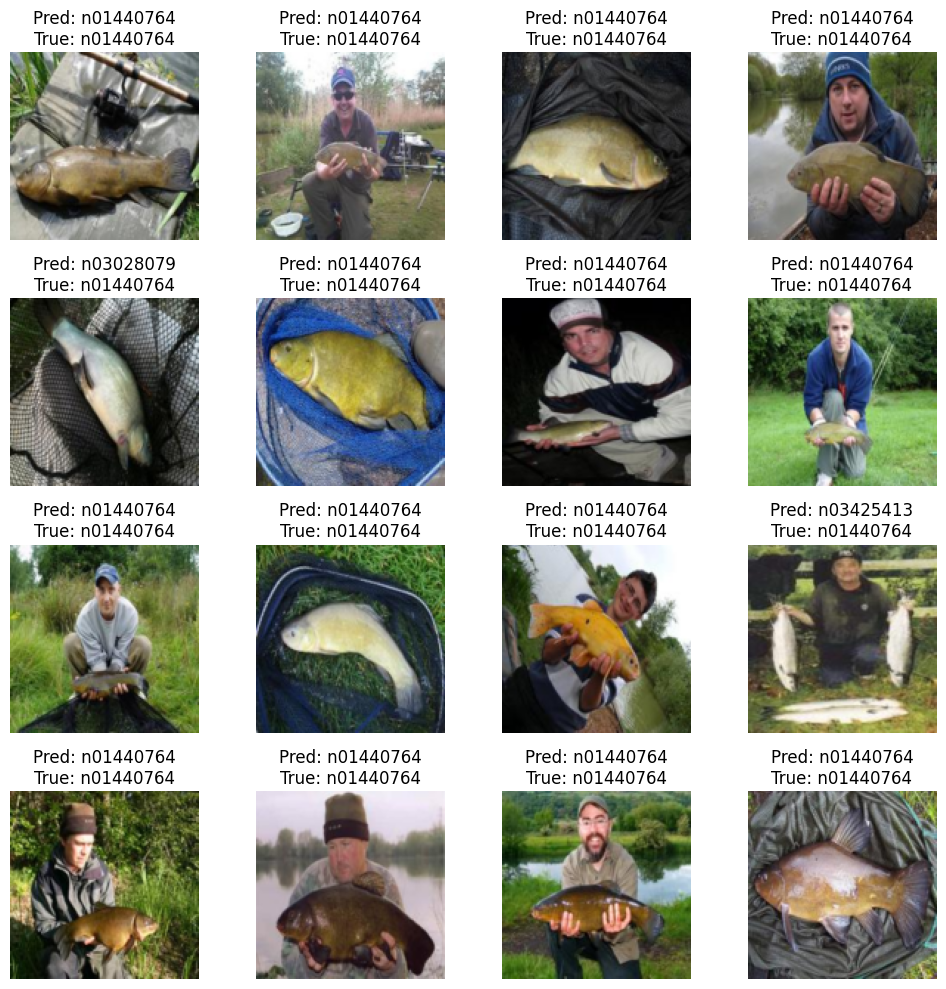

In [21]:
# Get a batch of validation images
dataiter = iter(val_loader)
images, labels = next(dataiter)

# Move images to the same device as model
device = "cuda" if torch.cuda.is_available() else "cpu"
images = images.to(device)
labels = labels.to(device)

# Get model predictions
resnet_model.to(device)
resnet_model.eval()
with torch.no_grad():
  outputs = resnet_model(images)
  predicted_labels = outputs.argmax(dim=1)

# Display the images with predicted labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = images[i].cpu().permute(1, 2, 0).numpy()  # Convert tensor to image
    img = (img * 0.5) + 0.5  # Undo normalization
    ax.imshow(img)
    ax.set_title(f"Pred: {train_dataset.classes[predicted_labels[i]]}\nTrue: {train_dataset.classes[labels[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

# Overview of ResNet18 Performance
The initial Validation Accuracy achieved is **76.56%**, marking an **11.96% improvement** over the basicCNN, which scored **68.38%**.  
From a sampled set of 16 images, ResNet-18 correctly identified 12 out of 16 images, resulting in **75.00%** accuracy for the batch.  

# Potential Areas for Improvement
Results could possibly be improved using the following techniques:
 - Regularization
  - Batch Normalization
  - Dropout
 - Data Augmentation
  - Random Flips, Rotations, Color Jitters
 - Longer Training
  - Increase to 15-20 epochs with early stopping

# Modify ResNet18 with Data Augmentation
Adding:  
 1. Random Horizontal Flip to help with left-right variations
 2. Random Rotation (15 degrees) to help with rotated images
 3. Color Jitter (Brightness, Contrast, Saturation) to simulate changes in lighting

In [23]:
import torchvision.transforms as transforms

# Define data augmentation transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of flipping
    transforms.RandomRotation(15),           # Rotate by up to 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_transform = transforms.Compose([  # No augmentation for validation set
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Reload datasets with new transformations
train_dataset = ImageFolder(root=os.path.join(dataset_path, "train"), transform=train_transform)
val_dataset = ImageFolder(root=os.path.join(dataset_path, "val"), transform=val_transform)

# DataLoader (batch size 32)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}")


Train size: 9469, Validation size: 3925


## Visualize the transformations

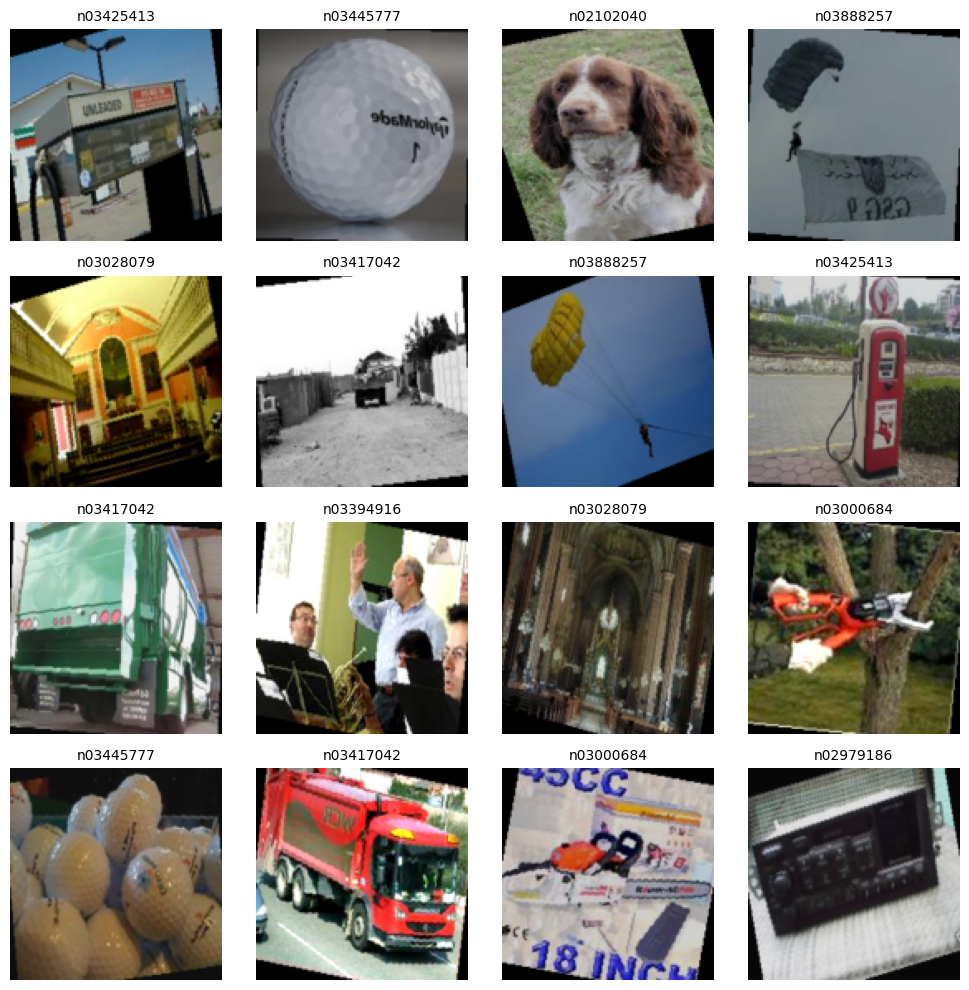

In [25]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Get a batch of training images with augmentations applied
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the augmented images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat[:min(len(images), 16)]):  # Ensure batch is at least 16 images
    img = images[i].cpu().detach().permute(1, 2, 0).numpy()  # Convert tensor to image
    img = (img * 0.5) + 0.5  # Undo normalization for better visualization

    ax.imshow(img)
    ax.set_title(train_dataset.classes[labels[i]], fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()


## Train ResNet18 with augmented data

In [24]:
# Initialize the model
resnet_augmented = ResNet18Classifier(num_classes=len(train_dataset.classes), lr=1e-3)

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min")

# Train the model
trainer = Trainer(max_epochs=10, accelerator="gpu" if torch.cuda.is_available() else "cpu", callbacks=[early_stopping])
trainer.fit(resnet_augmented, train_loader, val_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


## Save and Evaluate the Model

In [26]:
# Save model
torch.save(resnet_augmented.state_dict(), os.path.join(model_path, "resnet18_augmented.pth"))
print("ResNet-18 Model with Data Augmentation saved as resnet18_augmented.pth")

# Evaluate model
# Load the trained model
resnet_augmented = ResNet18Classifier(num_classes=len(train_dataset.classes))
resnet_augmented.load_state_dict(torch.load(os.path.join(model_path, "resnet18_augmented.pth")))
resnet_augmented.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Evaluate accuracy
resnet_augmented_accuracy = evaluate_model(resnet_augmented, val_loader)
print(f"ResNet-18 (Augmented) Validation Accuracy: {resnet_augmented_accuracy:.2f}%")


ResNet-18 Model with Data Augmentation saved as resnet18_augmented.pth


<ipython-input-26-908494b81acf>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_augmented.load_state_dict(torch.load(os.path.join(model_path, "resnet18_augmented.pth

ResNet-18 (Augmented) Validation Accuracy: 86.14%


# Overview of ResNet18 Performance with Data Augmentation
The **ResNet-18 model with Data Augmentation** achieved a **valication accuracy of 86.14%**, marking a **12.51% improvement** over the **ResNet-18 (76.56%)**, and a **25.97% improvement** over the **Basic CNN (68.38%)**.  


# **Transfer Learning with the CIFAR-10 Dataset**

CIFAR-10 contains 60k images each having 32x32 pixels.  
The images are divided into 10 classes.

Before transfer learning can be implemented, we must apply some augmentations and normalize the data to be consistent with the Imagenette dataset.

In [5]:
import torchvision
import torchvision.transforms as transforms

# Define CIFAR-10 data transformations
cifar_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match ResNet-18 input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
train_cifar = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=cifar_transform)
val_cifar = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=cifar_transform)

# Create DataLoaders
train_cifar_loader = torch.utils.data.DataLoader(train_cifar, batch_size=32, shuffle=True, num_workers=2)
val_cifar_loader = torch.utils.data.DataLoader(val_cifar, batch_size=32, shuffle=False, num_workers=2)

print(f"CIFAR-10 Training Set: {len(train_cifar)}, CIFAR-10 Validation Set: {len(val_cifar)}")


100%|██████████| 170M/170M [00:12<00:00, 13.2MB/s]


CIFAR-10 Training Set: 50000, CIFAR-10 Validation Set: 10000


# Load the Trained ResNet-18 model from Imagenette
This class will modify the final layer to use 10 classification categories from CIFAR-10.  
Additionally, it will fine tune the model.  


In [6]:
import torch.nn as nn
import torchvision.models as models
import pytorch_lightning as pl

# Define ResNet-18 for CIFAR-10 (using Imagenette pre-trained weights)
class ResNet18_CIFAR10(pl.LightningModule):
    def __init__(self, num_classes=10, lr=1e-3):
        super(ResNet18_CIFAR10, self).__init__()
        self.lr = lr

        # Load pre-trained ResNet-18 from Imagenette training
        self.model = models.resnet18(weights=None)  # Load without built-in weights
        state_dict = torch.load(os.path.join(model_path, "resnet18_augmented.pth"))
        self.model.load_state_dict(state_dict, strict=False)  # strict=False allows mismatched keys

        # Modify the last fully connected layer for CIFAR-10 (10 classes)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


# Train the ResNet-18 Model on CIFAR-10
Utilize transfer learning to train our ResNet-18 model on CIFAR-10.

In [9]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping

# Initialize the model
resnet_cifar10 = ResNet18_CIFAR10(num_classes=10, lr=1e-3)

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min")

# Train the model
trainer = Trainer(max_epochs=10, accelerator="gpu" if torch.cuda.is_available() else "cpu", callbacks=[early_stopping])
trainer.fit(resnet_cifar10, train_cifar_loader, val_cifar_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

# Save the Model

In [10]:
torch.save(resnet_cifar10.state_dict(), os.path.join(model_path, "resnet18_cifar10.pth"))
print(f"Fine-tuned ResNet-18 Model saved as {model_path}resnet18_cifar10.pth")


Fine-tuned ResNet-18 Model saved as /content/drive/MyDrive/AAA-MS6363/modelsresnet18_cifar10.pth


# Evaluate the Model with CIFAR-10 validation set

In [13]:
# Load the fine-tuned model
resnet_cifar10 = ResNet18_CIFAR10(num_classes=10)
resnet_cifar10.load_state_dict(torch.load(os.path.join(model_path, "resnet18_cifar10.pth")))
resnet_cifar10.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Define the evaluate_model function
import torch

def evaluate_model(model, dataloader, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.to(device)
    model.eval()  # Set model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():  # No gradient calculation for evaluation
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


# Evaluate accuracy
cifar10_accuracy = evaluate_model(resnet_cifar10, val_cifar_loader)
print(f"ResNet-18 (Fine-Tuned on CIFAR-10) Validation Accuracy: {cifar10_accuracy:.2f}%")


ResNet-18 (Fine-Tuned on CIFAR-10) Validation Accuracy: 82.04%


# Visualize predictions for better understanding

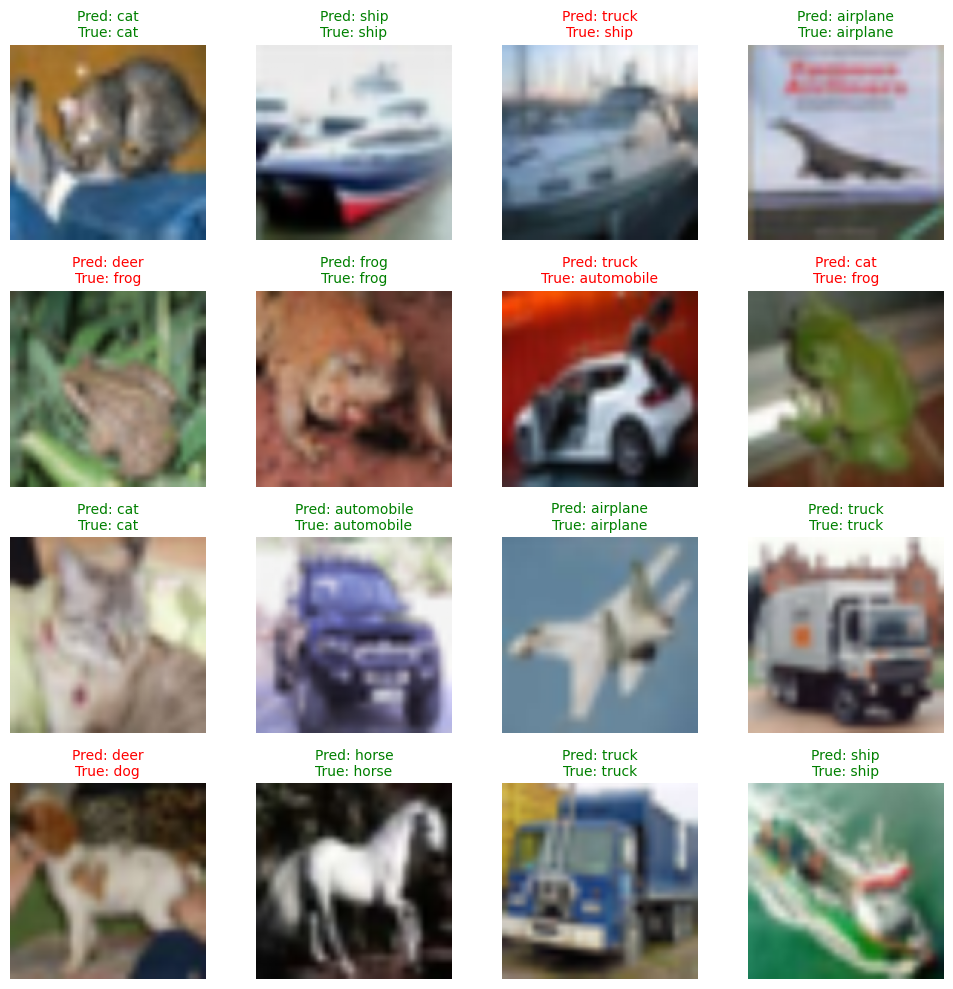

In [14]:
import matplotlib.pyplot as plt
import torchvision

# Get a batch of validation images
dataiter = iter(val_cifar_loader)
images, labels = next(dataiter)

# Move images to the same device as model
device = "cuda" if torch.cuda.is_available() else "cpu"
images = images.to(device)
labels = labels.to(device)

# Get model predictions
resnet_cifar10.to(device)
resnet_cifar10.eval()
with torch.no_grad():
    outputs = resnet_cifar10(images)
    predicted_labels = outputs.argmax(dim=1)

# CIFAR-10 class names
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Display the images with predicted vs. true labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat[:min(len(images), 16)]):  # Handle smaller batch sizes
    img = images[i].cpu().detach().permute(1, 2, 0).numpy()  # Convert tensor to image
    img = (img * 0.5) + 0.5  # Undo normalization for better visualization

    pred_label = cifar10_classes[predicted_labels[i]]
    true_label = cifar10_classes[labels[i]]

    ax.imshow(img)
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10,
                 color="green" if pred_label == true_label else "red")  # Highlight incorrect preds in red
    ax.axis("off")

plt.tight_layout()
plt.show()


# Overview of CIFAR-10 Transfer Learning from ResNet-18 Performance with Data Augmentation
The **CIFAR-10 trained using transfer learning from the ResNet-18 model with Data Augmentation** achieved a **valication accuracy of 82.04%**. This is a **4.76%** reduction in accuracy from the original model trained on Imagenette.  

Likely causes for the reduction in accuracy include:  
 1. Imagenette only trains on 10 types of objects  
  a. CIFAR-10 uses many more categories
 2. CIFAR-10 uses lower resolution (32x32) compared to Imagenette (160x160)
 3. Imagenette feature training may not generalize well with CIFAR-10 patterns, positions, rotations, lighting, etc.


# Quick Attempt to Improve CIFAR-10 with Learning Transfer
##### Ideas/Code from chatGPT
 1. Better Data Augmentation  
   a. Random Crop & Random Erasing  
   b. Stronger Color Jitter  
   c. Cutout Augmentation  
 2. Lower learning_rate
 3. Attempt to train more epochs  
   a. Increase patience  
   b. Increase epochs
 4. Use Pre-Trained ImageNet weights instead of Imagenette

In [10]:
import torchvision
import torchvision.transforms as transforms

train_cifar_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Randomly crop 32x32 regions
    transforms.RandomHorizontalFlip(),  # Flip images horizontally
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
train_cifar = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=train_cifar_transform)
val_cifar = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=train_cifar_transform)

# Create DataLoaders
train_cifar_loader = torch.utils.data.DataLoader(train_cifar, batch_size=32, shuffle=True, num_workers=2)
val_cifar_loader = torch.utils.data.DataLoader(val_cifar, batch_size=32, shuffle=False, num_workers=2)

print(f"CIFAR-10 Training Set: {len(train_cifar)}, CIFAR-10 Validation Set: {len(val_cifar)}")


CIFAR-10 Training Set: 50000, CIFAR-10 Validation Set: 10000


In [11]:
import torch.nn as nn
import torchvision.models as models
import pytorch_lightning as pl

# Define ResNet-18 for CIFAR-10 (using Imagenette pre-trained weights)
class ResNet18_CIFAR10(pl.LightningModule):
    def __init__(self, num_classes=10, lr=1e-3):
        super(ResNet18_CIFAR10, self).__init__()
        self.lr = lr

        # Load pre-trained ResNet-18 from Imagenette training
        self.model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)  # Load without built-in weights
        state_dict = torch.load(os.path.join(model_path, "resnet18_augmented.pth"))
        self.model.load_state_dict(state_dict, strict=False)  # strict=False allows mismatched keys

        # Modify the last fully connected layer for CIFAR-10 (10 classes)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


In [12]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping

# Initialize the model
resnet_cifar10 = ResNet18_CIFAR10(num_classes=10, lr=1e-4)

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5, mode="min")

# Train the model
trainer = Trainer(max_epochs=20, accelerator="gpu" if torch.cuda.is_available() else "cpu", callbacks=[early_stopping])
trainer.fit(resnet_cifar10, train_cifar_loader, val_cifar_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


# SAVE AND EVALUATE

In [13]:
torch.save(resnet_cifar10.state_dict(), os.path.join(model_path, "resnet18_cifar10_aug.pth"))
print(f"Fine-tuned ResNet-18 Model saved as {model_path}resnet18_cifar10_aug.pth")

Fine-tuned ResNet-18 Model saved as /content/drive/MyDrive/AAA-MS6363/modelsresnet18_cifar10_aug.pth


In [14]:
# Define the evaluate_model function
import torch

def evaluate_model(model, dataloader, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.to(device)
    model.eval()  # Set model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():  # No gradient calculation for evaluation
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy



In [14]:
# Load the fine-tuned model
resnet_cifar10 = ResNet18_CIFAR10(num_classes=10)
resnet_cifar10.load_state_dict(torch.load(os.path.join(model_path, "resnet18_cifar10_aug.pth")))
resnet_cifar10.eval().to("cuda" if torch.cuda.is_available() else "cpu")


# Evaluate accuracy
cifar10_accuracy = evaluate_model(resnet_cifar10, val_cifar_loader)
print(f"ResNet-18 (Fine-Fine-Tuned on CIFAR-10) Validation Accuracy: {cifar10_accuracy:.2f}%")

ResNet-18 (Fine-Tuned on CIFAR-10) Validation Accuracy: 83.80%


# Visualize

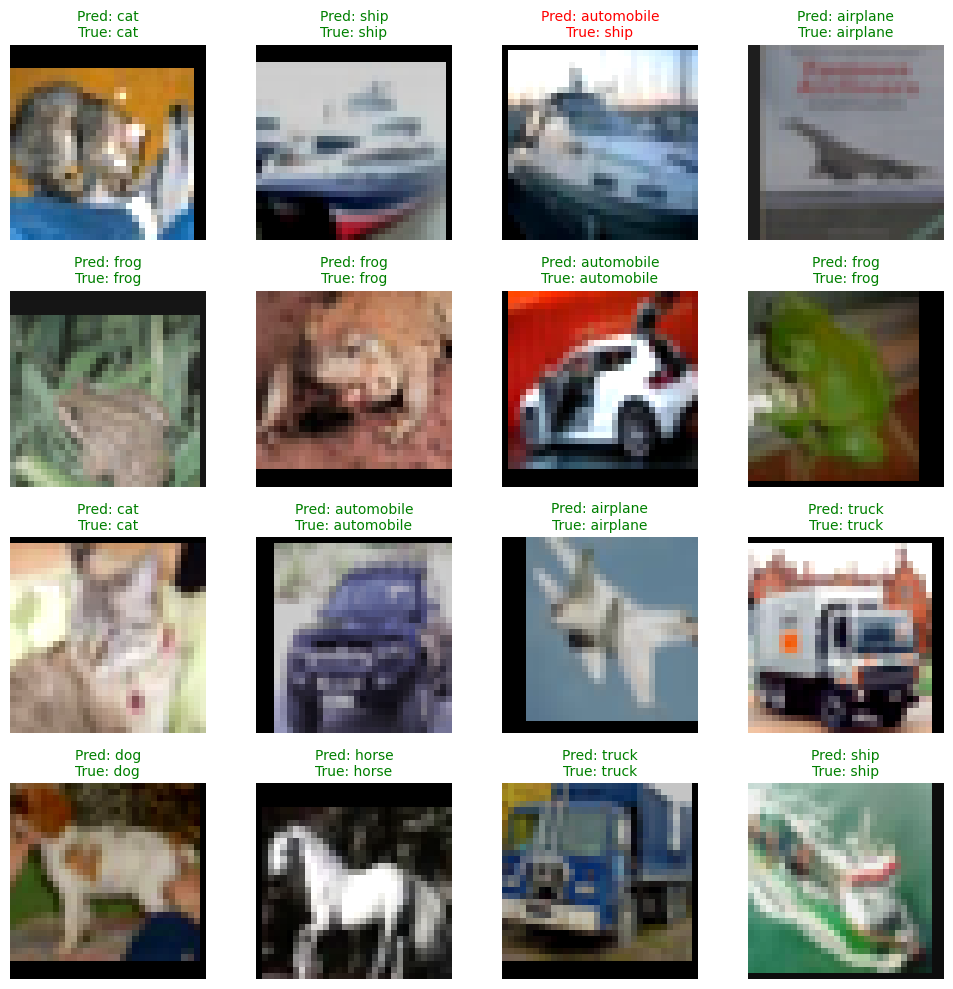

In [15]:
import matplotlib.pyplot as plt
import torchvision

# Get a batch of validation images
dataiter = iter(val_cifar_loader)
images, labels = next(dataiter)

# Move images to the same device as model
device = "cuda" if torch.cuda.is_available() else "cpu"
images = images.to(device)
labels = labels.to(device)

# Get model predictions
resnet_cifar10.to(device)
resnet_cifar10.eval()
with torch.no_grad():
    outputs = resnet_cifar10(images)
    predicted_labels = outputs.argmax(dim=1)

# CIFAR-10 class names
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Display the images with predicted vs. true labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat[:min(len(images), 16)]):  # Handle smaller batch sizes
    img = images[i].cpu().detach().permute(1, 2, 0).numpy()  # Convert tensor to image
    img = (img * 0.5) + 0.5  # Undo normalization for better visualization

    pred_label = cifar10_classes[predicted_labels[i]]
    true_label = cifar10_classes[labels[i]]

    ax.imshow(img)
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10,
                 color="green" if pred_label == true_label else "red")  # Highlight incorrect preds in red
    ax.axis("off")

plt.tight_layout()
plt.show()

# Missed Step: Train CIFAR from Scratch

In [6]:
import torch.nn as nn
import torchvision.models as models
import pytorch_lightning as pl

# Define ResNet-18 from scratch (no pretraining)
class ResNet18_Scratch(pl.LightningModule):
    def __init__(self, num_classes=10, lr=1e-3):
        super(ResNet18_Scratch, self).__init__()
        self.lr = lr

        # Initialize ResNet-18 without pre-trained weights
        self.model = models.resnet18(weights=None)  # No pretraining

        # Modify fully connected layer for CIFAR-10 classification
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


In [11]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define CIFAR-10 data transformations (no resizing needed for ResNet-18)
train_cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
train_cifar = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=train_cifar_transform)
val_cifar = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=val_cifar_transform)

# Create DataLoaders
train_cifar_loader = DataLoader(train_cifar, batch_size=32, shuffle=True, num_workers=2)
val_cifar_loader = DataLoader(val_cifar, batch_size=32, shuffle=False, num_workers=2)

print(f"CIFAR-10 Training Set: {len(train_cifar)}, CIFAR-10 Validation Set: {len(val_cifar)}")


CIFAR-10 Training Set: 50000, CIFAR-10 Validation Set: 10000


In [12]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping

# Initialize the model
resnet_scratch = ResNet18_Scratch(num_classes=10, lr=1e-3)

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min")

# Train the model
trainer = Trainer(max_epochs=10, accelerator="gpu" if torch.cuda.is_available() else "cpu", callbacks=[early_stopping])
trainer.fit(resnet_scratch, train_cifar_loader, val_cifar_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [15]:
# Save the trained model
torch.save(resnet_scratch.state_dict(), os.path.join(model_path, "resnet18_scratch_cifar10.pth"))
print(f"ResNet-18 (Scratch) Model saved as {model_path}/resnet18_scratch_cifar10.pth")

# Evaluate accuracy
resnet_scratch.eval().to("cuda" if torch.cuda.is_available() else "cpu")
scratch_cifar10_accuracy = evaluate_model(resnet_scratch, val_cifar_loader)
print(f"ResNet-18 (Scratch) Validation Accuracy: {scratch_cifar10_accuracy:.2f}%")


ResNet-18 (Scratch) Model saved as /content/drive/MyDrive/AAA-MS6363/models/resnet18_scratch_cifar10.pth
ResNet-18 (Scratch) Validation Accuracy: 76.57%


# Assignment 3 Report

## Deep Learning for Image Classification: Performance Comparison & Transfer Learning
1. Introduction
This report will discuss the models used in this assignment and the results obtained when training and testing the models with the Imagenette and CIFAR-10 datasets.

## Basic CNN: Model Architecture & Performance
1. Architecture
 - 3 Convolutional Layers (using ReLU activation and MaxPooling after each)
 - Fully connected (Dense) Layers implemented using Dropout
 - Cross-Entropy Loss is used for the loss function
 - Model uses the Adam optimizer with a learning rate of 0.001
2. Performance  

<center>
<table>
  <tr>
    <th>Metric</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Training Loss</td>
    <td><strong>0.288</strong></td>
  </tr>
  <tr>
    <td>Validation Loss</td>
    <td><strong>1.170<strong></td>
  </tr>
  <tr>
    <td>Test Accuracy</td>
    <td><strong>68.38%</strong></td>
  </tr>
</table>
</center>

3. Observations  
 - The model performed pretty well, but could have done better.
 - Dropout of 50% of neurons in the dense layer may have helped, but generalization was never fully optimized.

## ResNet-18 Model Architecture & Performance
1. Architecture
ResNet-18 is a deep residual network with skip connections that allow deeper architectures to train effectively (chatGPT-4o, March 2025).  I used:  
 - Pretrained ResNet-18 from ImageNet
 - Modified fully connected layer for classification
 - Adam optimizer with a learning rate of 0.001  
2. Performance

<center>
<table>
  <tr>
    <th>Metric</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Training Loss</td>
    <td><strong>0.260</strong></td>
  </tr>
  <tr>
    <td>Validation Loss</td>
    <td><strong>0.591</strong></td>
  </tr>
  <tr>
    <td>Test Accuracy</td>
    <td><strong>76.56%</strong></td>
  </tr>
</table>
</center>

3. Observations
 - Significant improvement (**+8.18%**) over the Basic CNN. This shows that ResNet-18 is able to extract superior features.
 - Model may still be overfitting and may benefit from regularization

## Regularization
1. **Data Augmentation**  
The data was augmented in the following ways to overcome overfitting issues:  
 - Random Horizontal Flip (50%)
 - Random Rotations (+/- 15 degrees)
 - Color Jitter (Brightness, Contrast, and Saturation)  

2. Performance Comparison  

<center>
<table>
  <tr>
    <th>Model</th>
    <th>Validation Accuracy</th>
    <th>Improvement</th>
  </tr>
  <tr>
    <td>ResNet-18 (No Augmentations)</td>
    <td><strong>76.56%</strong></td>
    <td>Baseline</td>
  </tr>
  <tr>
    <td>ResNet-18 (Augmented)</td>
    <td><strong>86.14%</strong></td>
    <td><strong>+9.58%</strong></td>
  </tr>
</table>
</center>

3. Observations  
 - Data augmentation had a significant improvement (**9.58%**) on generalization.
 - Model was better able to handle small variations on sample images.  

## Transfer Learning: Fine-Tuning ResNet-18 on CIFAR-10
1. Testing transfer learning
 - Re-train ResNet-18 from scratch on CIFAR-10
 - Fine-tune the pre-trained ResNet-18 (Imagenette weights) on CIFAR-10
2. Performance Comparison  

<center>
<table>
  <tr>
    <th>Model</th>
    <th>Validation Accuracy</th>
    <th>Improvement</th>
  </tr>
  <tr>
    <td>ResNet-18 (From Scratch on CIFAR-10)</td>
    <td><strong>76.57%</strong></td>
    <td>Baseline</td>
  </tr>
  <tr>
    <td>ResNet-18 (Fine-Tuned on CIFAR-10, Pretrained on Imagenette)</td>
    <td><strong>82.04%</strong></td>
    <td><strong>+7.14%</strong></td>
  </tr>
  <tr>
    <td>ResNet-18 (Fine-Tuned on CIFAR-10 with Augmentation)</td>
    <td><strong>83.80%</strong></td>
    <td><strong>+8.79%</strong></td>
  </tr>
</table>
</center>

3. Observations  
 - Fine-tuning on Imagenette improved CIFAR-10 accuracy by 7.14%
 - Further fine-tuning with augmentation raised accuracy to 83.80%

4. Rationale for improvements  
 - Imagenette pre-training provided useful feature extraction for edges, shapes, textures, etc.  
 - Fine-tuning adapted the model for CIFAR-10 restrictions
 - Augmentation improved the models ability to generalize

## Final Comparison: All Models

<center>
<table>
  <tr>
    <th>Model</th>
    <th>Validation Accuracy</th>
    <th>Key Takeaways</th>
  </tr>
  <tr>
    <td>Basic CNN</td>
    <td><strong>68.38%</strong></td>
    <td>Baseline, struggled with feature extraction</td>
  </tr>
  <tr>
    <td>ResNet-18 (No Augmentations)</td>
    <td><strong>76.56%</strong></td>
    <td>Pretrained ImageNet model improved accuracy</td>
  </tr>
  <tr>
    <td>ResNet-18 (Augmented)</td>
    <td><strong>86.14%</strong></td>
    <td>Regularization improved generalization</td>
  </tr>
  <tr>
    <td>ResNet-18 (Fine-Tuned on CIFAR-10, Pretrained on Imagenette)</td>
    <td><strong>82.04%</strong></td>
    <td>Transfer learning boosted performance</td>
  </tr>
  <tr>
    <td>ResNet-18 (Fine-Tuned on CIFAR-10 with Augmentation)</td>
    <td><strong>83.80%</strong></td>
    <td>Improved performance on CIFAR combining fine-tuning with augmentation</td>
  </tr>
</table>
</center>

## Conclusion
The power of deep learning models and transfer learning was leveraged to show that Deep Convolutional Neural Networks are powerful tools for image identification.  
ResNet-18 was able to outperform a basic CNN because it is more adept at feature extraction.  
Data augmentation, as a tool, can help prevent overfitting and improve a model's ability to generalize.  
Transfer learning was demonstrated by fine-tuning the training model using Imagenette before training on CIFAR-10 helped improve the model accuracy.
